In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
coords = pd.read_csv("node_coords.csv")
edges = np.loadtxt("../../extracted_data/sioux_falls/edges.csv", dtype=int)

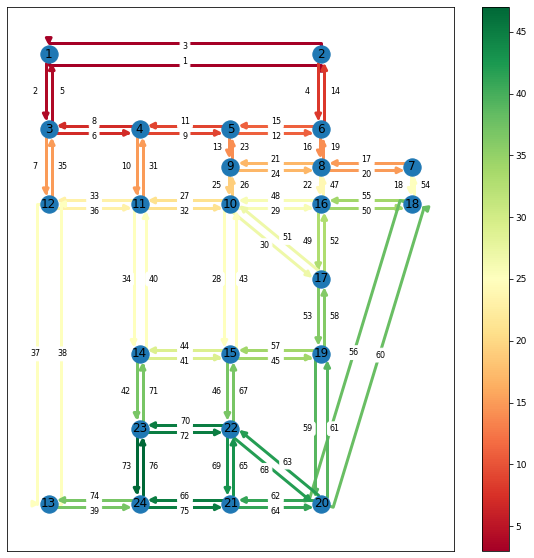

In [287]:
G = nx.DiGraph()
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size': 9})

for idx, value in coords.iterrows():
    G.add_node(value["node_id"].astype(int),pos=(value["x_coord"],value["y_coord"]))
pos=nx.get_node_attributes(G,'pos')
    
edge_list = []
for idx, edge in enumerate(edges):
    edge_list.append((edge[0], edge[1], {"w": f"{idx+1}"}))
G.add_edges_from(edge_list)
# pos=nx.spring_layout(G,seed=5)
    
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
    
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.20
# nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')

color_values = np.sum(edges, axis=1)
cmap = plt.cm.RdYlGn
norm = matplotlib.colors.Normalize()
colors = cmap(norm(color_values))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, 
                       connectionstyle=f'bar, fraction=0.04',
#                          connectionstyle="bar",
#                        arrowstyle="|-|",
                       edge_color=colors, arrowsize=12, width=3)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)

edge_weights = nx.get_edge_attributes(G,'w')
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
text_items = my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad)
# nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)
plt.show()

In [238]:
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=8,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

#     import pdb; pdb.set_trace()
    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
#         (x, y) = (
#             x1 * label_pos + x2 * (1.0 - label_pos),
#             y1 * label_pos + y2 * (1.0 - label_pos),
#         )
#         pos_1 = ax.transData.transform(np.array(pos[n1]))
#         pos_2 = ax.transData.transform(np.array(pos[n2]))
#         linear_mid = 0.5*pos_1 + 0.5*pos_2
#         d_pos = pos_2 - pos_1
#         rotation_matrix = np.array([(0,1), (-1,0)])
#         ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
#         ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
#         ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
#         bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
#         (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

#         import pdb; pdb.set_trace()
            
        # assume straight edges
        x0 = x1 + (x2 - x1)/2
        y0 = y1 + (y2 - y1)/2
        
        if x2 - x1 == 0:
            if y2 - y1 > 0:
                lam = np.pi/2
            else:
                lam = -np.pi/2
        else:
            lam = np.arctan2(y2 - y1, x2 - x1)
        
#         import pdb; pdb.set_trace()
        offset = 0.3
        x = x0 + np.sin(lam)*offset
        y = y0 - np.cos(lam)*offset
        
        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

#     import pdb; pdb.set_trace()
    return text_items

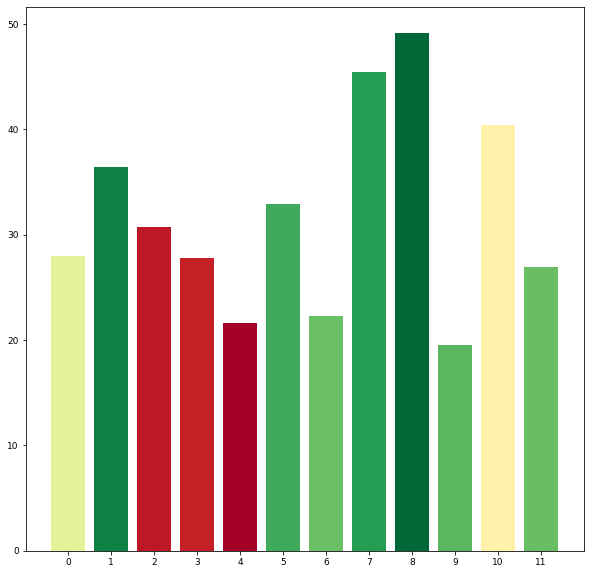

In [262]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

x = np.arange(12)
y = np.random.rand(len(x))*51
c = np.random.rand(len(x))*3+1.5
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.RdYlGn
norm = matplotlib.colors.Normalize()

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

In [260]:
print(c)

[3.20413368 4.27678991 1.71310817 1.7613879  1.56065519 3.99785954
 3.83447025 4.11003644 4.43585503 3.89747569 2.88443809 3.84158753]


In [241]:
sm